In [3]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [4]:
benin_data = pd.read_csv("D:\\Projects\\MoonLight-Energy-Solutions\\Data\\benin.csv")

In [5]:
benin_data.head()
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'],errors='coerce')



In [7]:
benin_data = benin_data.sort_values(by='Timestamp').reset_index(drop=True)


In [8]:
benin_data['Timestamp'].head()
benin_data['Timestamp'].isna().sum()


np.int64(0)

In [9]:
benin_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [10]:
benin_data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [11]:
#Summary Statistics
benin_data.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [12]:
#Data Quality Check
#. 1. Looking for missing values
missing_value=benin_data.isnull().sum()
print(missing_value)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [13]:
negative_values=benin_data.loc[(benin_data['GHI']<0)|(benin_data['DNI']<0)|(benin_data['DHI']<0)]
print(negative_values)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1      2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2      2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3      2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4      2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-08-08 23:56:00 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3   
525596 2022-08-08 23:57:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2   
525597 2022-08-08 23:58:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6   
525598 2022-08-08 23:59:00 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9   
525599 2022-08-09 00:00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          0.4      0.1  122.1 

In [14]:
negative_values = benin_data.loc[(benin_data['GHI']==5)]
print(negative_values)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
9039   2021-08-15 06:40:00  5.0  0.1  5.0   6.0   6.0  23.9   98.8  1.7   
12543  2021-08-17 17:04:00  5.0  0.0  5.2   8.2   8.1  26.8   87.3  3.0   
14820  2021-08-19 07:01:00  5.0 -0.1  5.7  10.5  10.5  21.6  100.0  0.0   
15539  2021-08-19 19:00:00  5.0 -0.4  5.0   5.5   5.5  26.4   84.1  0.0   
23441  2021-08-25 06:42:00  5.0  3.7  5.0   5.6   5.5  22.6   97.9  0.1   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
504398 2022-07-25 06:39:00  5.0 -0.2  5.0   5.1   5.1  24.7   95.4  1.4   
513100 2022-07-31 07:41:00  5.0 -0.3  5.0   6.8   6.8  21.1   97.3  3.6   
525190 2022-08-08 17:11:00  5.0 -0.2  5.0   6.4   6.3  22.2   98.9  5.0   
525191 2022-08-08 17:12:00  5.0 -0.3  5.0   6.5   6.4  22.2   98.9  5.3   
525282 2022-08-08 18:43:00  5.0 -0.1  4.2   8.7   8.5  22.5   98.4  1.6   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
9039       1.9     

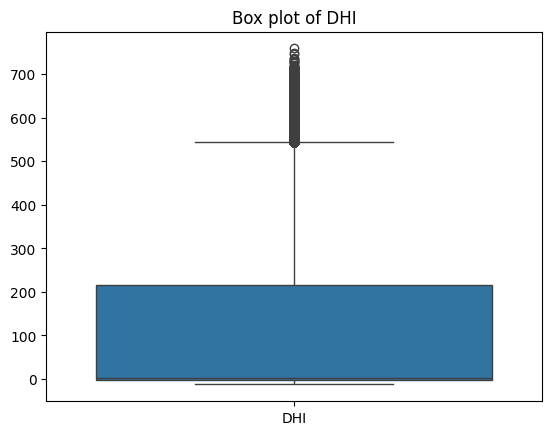

In [15]:
# Data Quality Check
# 3. Outlier Detection
sns.boxplot([benin_data['DHI']])
plt.title("Box plot of DHI")
plt.show()

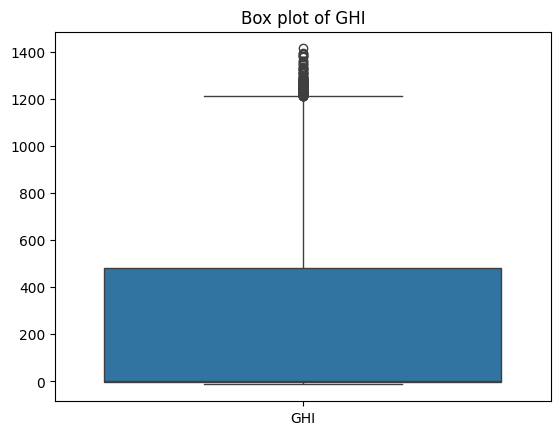

In [16]:
sns.boxplot([benin_data['GHI']])
plt.title("Box plot of GHI")
plt.show()

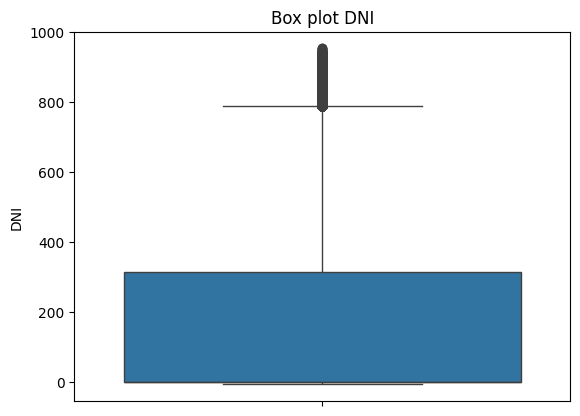

In [17]:
sns.boxplot(benin_data['DNI'])
plt.title("Box plot DNI")
plt.show()

In [18]:
# Time Series Analysis DHI
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


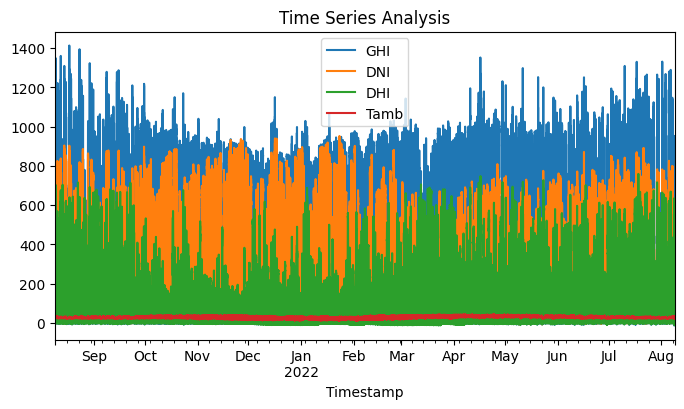

In [19]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])
benin_data.set_index('Timestamp', inplace=True)
benin_data[['GHI','DNI','DHI','Tamb']].plot(figsize=(8,4))
plt.title("Time Series Analysis")
plt.show()

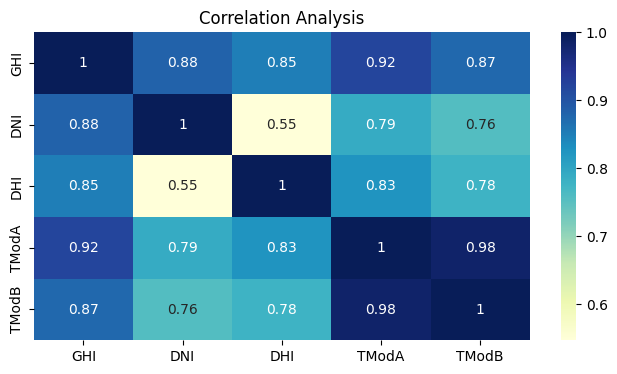

In [20]:
co_mtx=benin_data[['GHI', 'DNI', 'DHI','TModA','TModB']].corr(numeric_only='True')
fig, ax = plt.subplots(figsize=(8,4))  # Set the figure size
sns.heatmap(co_mtx,cmap="YlGnBu",annot=True, ax=ax)
plt.title('Correlation Analysis')
plt.show()

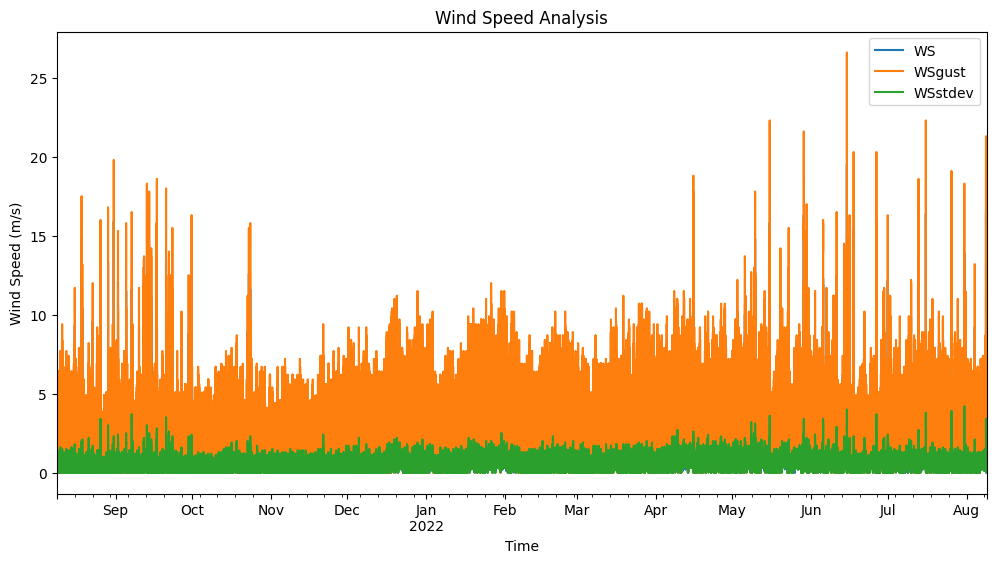

In [21]:
benin_data[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

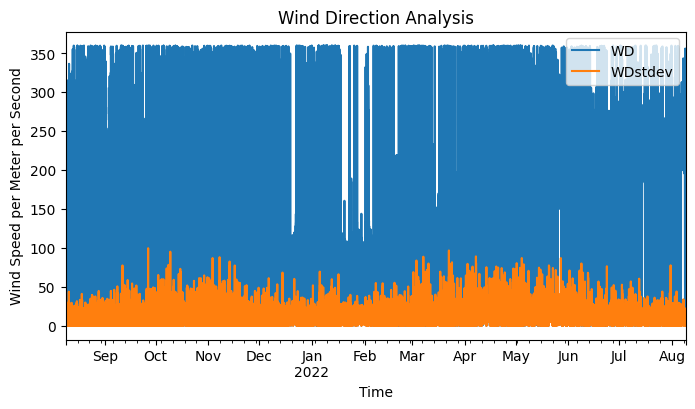

In [22]:
benin_data[['WD','WDstdev']].plot(figsize=(8,4))
plt.title('Wind Direction Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Speed per Meter per Second')
plt.show()

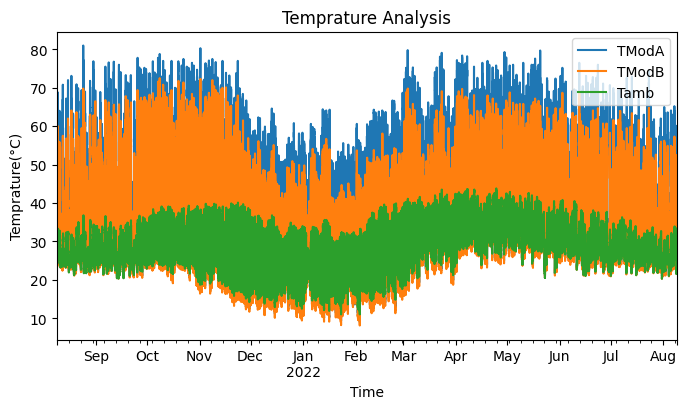

In [23]:
benin_data[['TModA', 'TModB', 'Tamb']].plot(figsize=(8,4))
plt.title('Temprature Analysis')
plt.xlabel('Time')
plt.ylabel('Temprature(°C)')
plt.show()

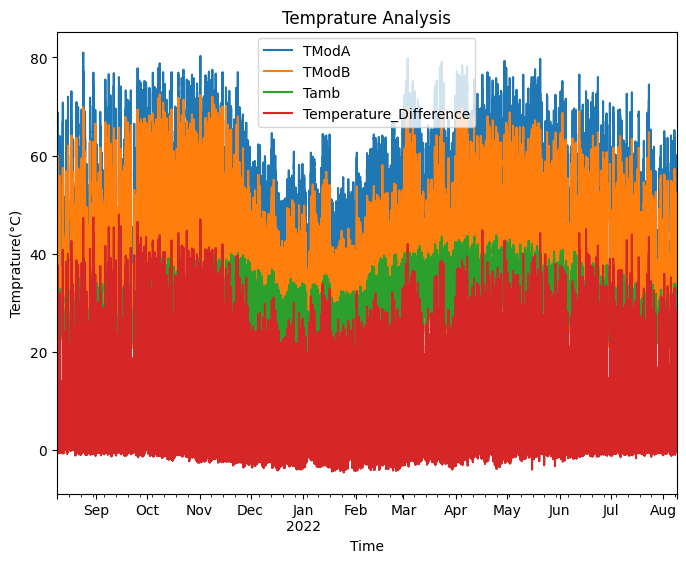

In [24]:
benin_data['Temperature_Difference'] = benin_data['TModA'] - benin_data['Tamb']
benin_data[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(8,6))
plt.title('Temprature Analysis')
plt.xlabel('Time')
plt.ylabel('Temprature(°C)')
plt.show()

Frequency Distribution


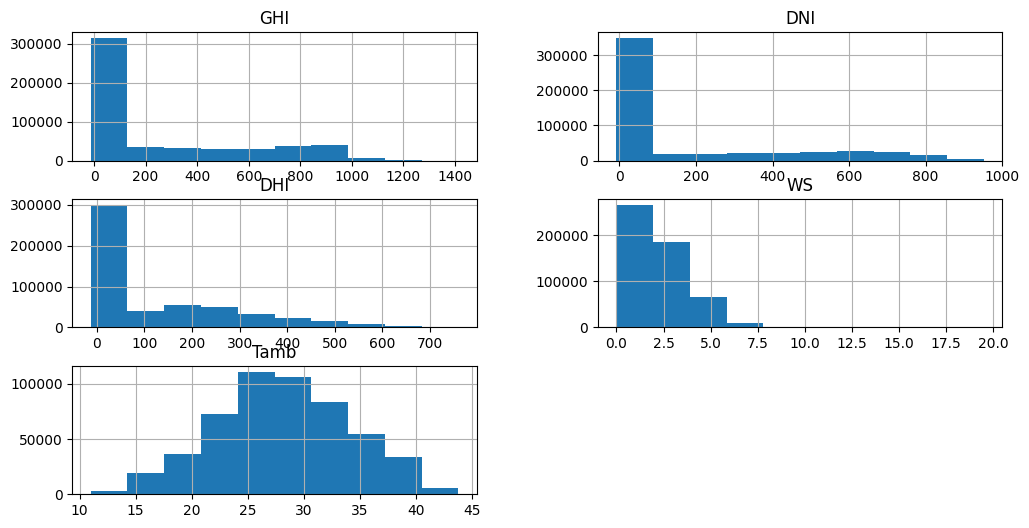

In [25]:
benin_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
print("Frequency Distribution")
plt.show()

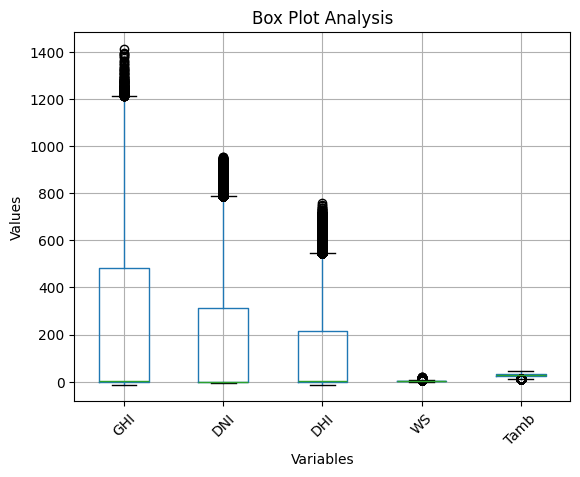

In [26]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = benin_data[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

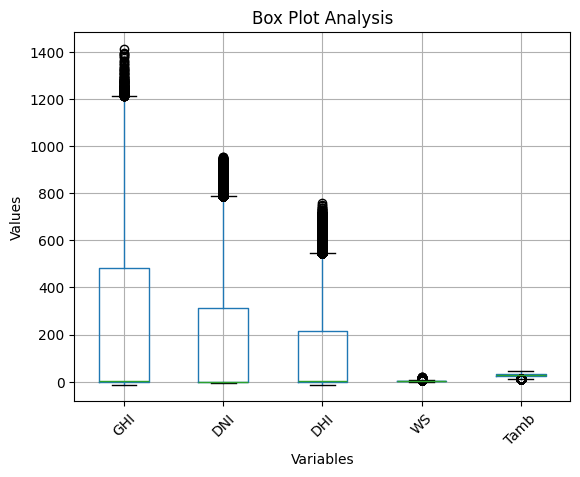

In [27]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = benin_data[variables]
# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

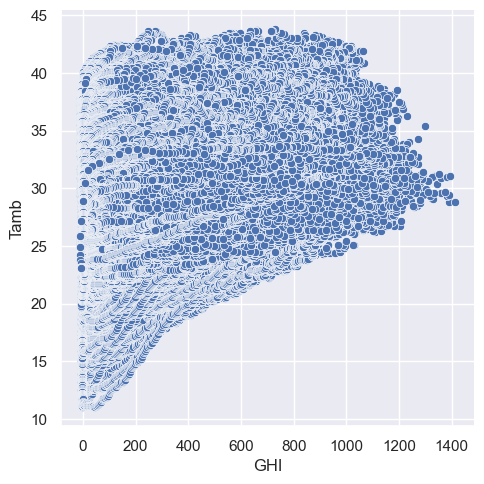

In [28]:

#set grid style
sns.set(style="darkgrid")
sns.relplot(x="GHI",y="Tamb",data=benin_data)


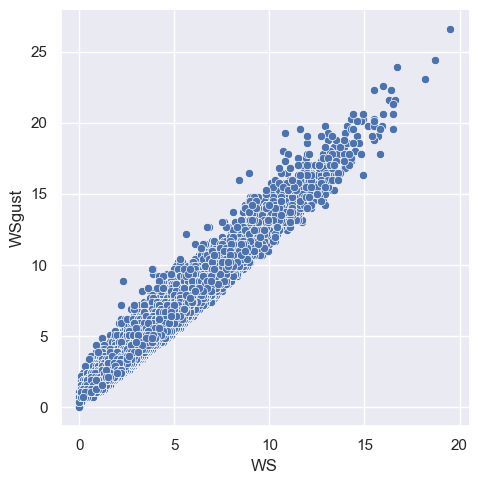

In [29]:
sns.set(style="darkgrid")
sns.relplot(x="WS",y="WSgust",data=benin_data)

'\nMissing Values:'

GHI                            0
DNI                            0
DHI                            0
ModA                           0
ModB                           0
Tamb                           0
RH                             0
WS                             0
WSgust                         0
WSstdev                        0
WD                             0
WDstdev                        0
BP                             0
Cleaning                       0
Precipitation                  0
TModA                          0
TModB                          0
Comments                  525600
Temperature_Difference         0
dtype: int64

'\nCleaned Dataset:'

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Temperature_Difference
Timestamp,,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,1.2,0.2,1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,,0.1
2021-08-09 00:02:00,1.1,0.2,1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,,0.1
2021-08-09 00:03:00,1.1,0.2,1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,,0.2
2021-08-09 00:04:00,1.1,0.1,1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,,0.2
2021-08-09 00:05:00,1.0,0.1,1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,,0.2


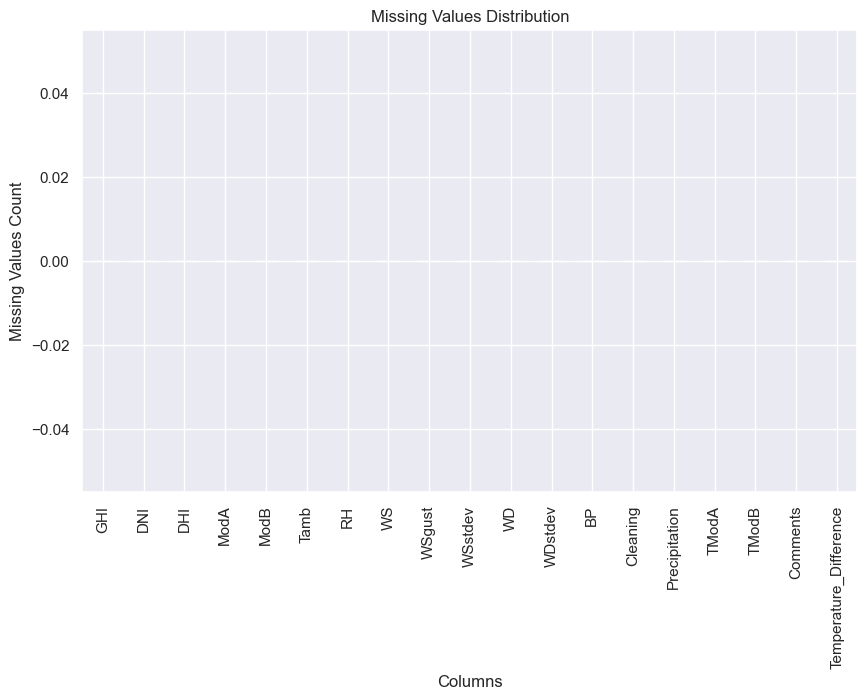

In [30]:
from IPython.display import display
# Check for missing values
display("\nMissing Values:")
display(benin_data.isnull().sum())

# Handling missing values
# Replace missing values in the "Comments" column with an empty string
benin_data["Comments"] = benin_data["Comments"].fillna("")

# Handling incorrect entries
# Remove the negative sign from negative values in "GHI", "DNI", and "DHI" columns
benin_data["GHI"] = benin_data["GHI"].abs()
benin_data["DNI"] =benin_data["DNI"].abs()
benin_data["DHI"] = benin_data["DHI"].abs()


# Display the cleaned dataset
display("\nCleaned Dataset:")
display (benin_data.head())

# Save the cleaned dataset to a new file
benin_data.to_csv("cleaned_benin_dataset.csv", index=False)

# Visualize the distribution of missing values
missing_values_count = benin_data.isnull().sum()
missing_values_count.plot(kind='bar', figsize=(10, 6))
plt.title("Missing Values Distribution")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()

In [31]:
benin_data.loc[benin_data['GHI'] < 0, 'GHI'] = None
benin_data.loc[benin_data['DNI'] > 1200, 'DNI'] = None
benin_data.loc[benin_data['GHI'] > 1500, 'GHI'] = None
benin_data.loc[benin_data['DNI'] < 0, 'DNI'] = None
benin_data.loc[benin_data['DHI'] < 0, 'DHI'] = None

In [34]:
df = benin_data.reset_index()
benin_data.columns


Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments', 'Temperature_Difference'],
      dtype='object')

In [36]:
benin_data['Hour']=benin_data.index.hour
benin_data['Day']=benin_data.index.day
benin_data['Month']=benin_data.index.month
benin_data['Year']=benin_data.index.year

In [40]:
benin_data['Timestamp'] = benin_data.index

In [41]:
benin_data[['Timestamp','Hour','Day','Month','Year']].head()

,Timestamp,Hour,Day,Month,Year
Timestamp,,,,,
2021-08-09 00:01:00,2021-08-09 00:01:00,0,9,8,2021
2021-08-09 00:02:00,2021-08-09 00:02:00,0,9,8,2021
2021-08-09 00:03:00,2021-08-09 00:03:00,0,9,8,2021
2021-08-09 00:04:00,2021-08-09 00:04:00,0,9,8,2021
2021-08-09 00:05:00,2021-08-09 00:05:00,0,9,8,2021


In [42]:
df_daily = benin_data.resample('D', on='Timestamp').sum()

# Convert Wh/m² to kWh/m²
df_daily['GHI_kWh'] = df_daily['GHI'] / 1000
df_daily['DNI_kWh'] = df_daily['DNI'] / 1000
df_daily['DHI_kWh'] = df_daily['DHI'] / 1000


In [43]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'], errors='coerce')
df = benin_data.set_index('Timestamp')


In [45]:
df_monthly = benin_data.resample('ME', on='Timestamp').mean(numeric_only=True)


In [46]:
benin_data['Diffuse_Fraction'] = benin_data['DHI']/benin_data['GHI']

In [47]:
benin_data.describe()

c:\Users\MOON\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,...,Precipitation,TModA,TModB,Temperature_Difference,Hour,Day,Month,Year,Timestamp,Diffuse_Fraction
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,...,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600,5.255170e+05
mean,243.358189,167.696217,118.627106,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,...,0.001905,35.246026,32.471736,7.066343,11.500000,15.720548,6.526027,2021.602742,2022-02-07 12:00:30.000000512,inf
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,...,0.000000,9.000000,8.100000,-4.600000,0.000000,1.000000,1.000000,2021.000000,2021-08-09 00:01:00,0.000000e+00
25%,2.000000,0.400000,2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,...,0.000000,24.200000,23.600000,-1.000000,5.750000,8.000000,4.000000,2021.000000,2021-11-08 06:00:45,5.807399e-01
50%,7.100000,0.800000,8.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,...,0.000000,30.000000,28.900000,0.400000,11.500000,16.000000,7.000000,2022.000000,2022-02-07 12:00:30,9.411765e-01
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,...,0.000000,46.900000,41.500000,15.500000,17.250000,23.000000,10.000000,2022.000000,2022-05-09 18:00:15,1.008837e+00
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,...,2.500000,81.000000,72.500000,48.000000,23.000000,31.000000,12.000000,2022.000000,2022-08-09 00:00:00,inf
std,329.079922,261.384832,156.263095,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,...,0.037115,14.807258,12.348743,10.987055,6.922193,8.796255,3.447855,0.489331,NaN,NaN


In [48]:
#Direct Beam Strength
benin_data['Beam_Ratio'] = benin_data['DNI'] / benin_data['GHI']


In [49]:
# Step 1: Convert the time column to datetime if it's not already
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])

# Step 2: Set it as the index
benin_data.set_index('Timestamp', inplace=True)

# Step 3: Now resample and compute standard deviation
ghi_hourly_std = benin_data.resample('H').GHI.std()


C:\Users\MOON\AppData\Local\Temp\ipykernel_22184\3574262961.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ghi_hourly_std = benin_data.resample('H').GHI.std()


In [50]:
ghi_daily_std = df.resample('D').GHI.std()

In [51]:
df_daily['PSH'] = df_daily['GHI_kWh']
df_daily['PSH'].describe()

count    366.000000
mean     349.478317
std       69.697698
min        0.005500
25%      330.220000
50%      367.563150
75%      396.035175
max      440.624700
Name: PSH, dtype: float64

In [52]:
df_daily.groupby(df_daily.index.month)['PSH'].mean()

Timestamp
1     346.016800
2     383.450236
3     363.025013
4     391.066317
5     373.045923
6     337.548860
7     322.822258
8     281.051972
9     322.934127
10    378.747774
11    362.295617
12    337.743745
Name: PSH, dtype: float64

In [53]:
benin_data[['GHI', 'TModA']].corr()


,GHI,TModA
GHI,1.000000,0.919305
TModA,0.919305,1.000000


In [54]:
benin_data[['WS', 'TModA']].corr()

,WS,TModA
WS,1.000000,0.429899
TModA,0.429899,1.000000


In [ ]:
# Remove night time and bad sensor readings
df_benin = benin_data[benin_data['GHI']>20].copy()

In [ ]:
# Replace any remaining extremley small GHI Values
df_benin.loc[df_benin['GHI']<50,'GHI'] = None

In [69]:
df_benin['Diffuse_Fraction'] = df_benin['DHI']/df_benin['GHI']
df_benin['Beam_Ratio'] = df_benin['DNI'] / df_benin['GHI']

In [70]:
# Remove impossible Values
df_benin.loc[(df_benin['Diffuse_Fraction'] < 0) | 
             (df_benin['Diffuse_Fraction'] > 1), 'Diffuse_Fraction'] = None

df_benin.loc[(df_benin['Beam_Ratio'] < 0) | 
             (df_benin['Beam_Ratio'] > 1.2), 'Beam_Ratio'] = None


In [ ]:
# Ensuring the numbers are numeric
df_benin['Diffuse_Fraction'] = pd.to_numeric(df_benin['Diffuse_Fraction'], errors='coerce')
df_benin['Beam_Ratio'] = pd.to_numeric(df_benin['Beam_Ratio'], errors='coerce')

In [87]:
summary = {
    'Annual_GHI_kWh' : df_daily['GHI_kWh'].sum(),
    'Average_PSH' : df_daily['GHI_kWh'].mean(),
    'Diffuse_Fraction_mean' :df_benin['Diffuse_Fraction'].mean(),
    'Beam_Ratio_mean' : df_benin['Beam_Ratio'].mean(),
    'GHI_hourly_std_mean' : ghi_hourly_std.mean(),
    'GHI_daily_std_mean' : ghi_daily_std.mean(),
    'Avg_Temperature' : df['TModA'].mean(),
    'Avg_Wind' : df['WS'].mean(),
    'Total_Precip_mm' : df['Precipitation'].sum(),
}


In [88]:
summary_df=pd.DataFrame([summary])

In [89]:
summary_df

,Annual_GHI_kWh,Average_PSH,Diffuse_Fraction_mean,Beam_Ratio_mean,GHI_hourly_std_mean,GHI_daily_std_mean,Avg_Temperature,Avg_Wind,Total_Precip_mm
0,127909.0642,349.478317,0.595858,0.533681,34.985889,321.471222,35.246026,2.121113,1001.2


In [90]:
summary_df.to_csv("benin_summary.csv",index=False)